In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def forward_diff(f,xn,h):
    return (f(xn+h) - f(xn))/h

def backward_diff(f,xn,h):
    return (f(xn) - f(xn-h))/h

def central_diff(f,xn,h):
    return (f(xn+h) - f(xn-h))/(2*h)

def five_point_approx(f,xn,h):
    return (f(xn-2*h)-8*f(xn-h)+8*f(xn+h)-f(xn+2*h))/(12*h)

In [3]:
def f(x):
    return np.sin(x)

hs = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001]

def f(x):
    return np.sin(x)

xn = 2*np.pi/5
exact = np.cos(xn)

print("%10s %10s %10s %10s %10s %10s"%("h values","Forward","Backward","Central","Five point","Exact"))
for h in hs:
    print("%10.6f %10.6f %10.6f %10.6f %10.6f %10.6f"%(h, forward_diff(f,xn,h),backward_diff(f,xn,h),central_diff(f,xn,h),five_point_approx(f,xn,h),exact))


  h values    Forward   Backward    Central Five point      Exact
  0.500000   0.063449   0.529153   0.296301   0.308392   0.309017
  0.200000   0.212172   0.401750   0.306961   0.309001   0.309017
  0.100000   0.260989   0.356015   0.308502   0.309016   0.309017
  0.050000   0.285117   0.332660   0.308888   0.309017   0.309017
  0.020000   0.299486   0.318507   0.308996   0.309017   0.309017
  0.010000   0.304257   0.313767   0.309012   0.309017   0.309017
  0.005000   0.306638   0.311393   0.309016   0.309017   0.309017
  0.002000   0.308066   0.309968   0.309017   0.309017   0.309017
  0.001000   0.308541   0.309492   0.309017   0.309017   0.309017
  0.000500   0.308779   0.309255   0.309017   0.309017   0.309017
  0.000200   0.308922   0.309112   0.309017   0.309017   0.309017
  0.000100   0.308969   0.309065   0.309017   0.309017   0.309017


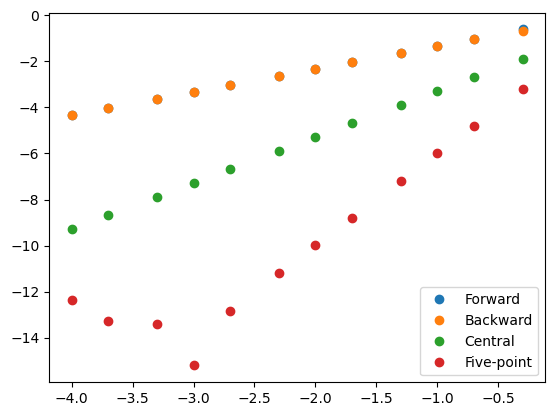

In [4]:
diff_values = np.zeros((len(hs),4))
k = 0
methods = [forward_diff,backward_diff,central_diff,five_point_approx]
descriptions = ["Forward","Backward","Central","Five-point"]
k = 0
for method in methods:
    ys = [abs(method(f,xn,h)-exact) for h in hs]
    plt.plot(np.log10(hs),np.log10(ys),"o",label=descriptions[k])
    plt.legend()
    k += 1

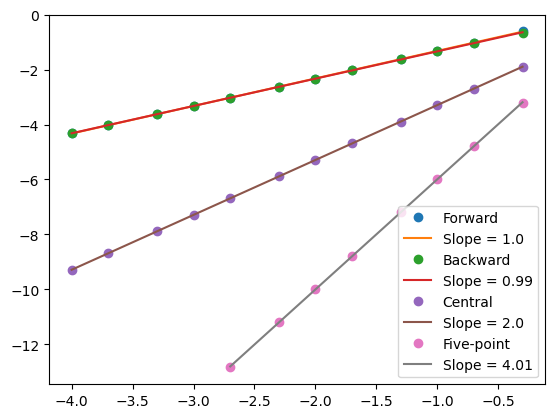

In [5]:
def eq_of_line(xs, p0, p1):
    return p0*xs+p1

# creating an array to store the differences
diff_values = np.zeros((len(hs),4))
k = 0
methods = [forward_diff,backward_diff,central_diff,five_point_approx]
descriptions = ["Forward","Backward","Central","Five-point"]
k = 0
for method in methods:
    ys = np.log10([abs(method(f,xn,h)-exact) for h in hs])
    xs = np.log10(hs)
    #plt.figure()
    if k==3:
        numdata = 8
    else:
        numdata = len(hs)
    xs = xs[:numdata]
    ys = ys[:numdata]
    plt.plot(xs,ys,"o",label=descriptions[k])
    params, covariance = curve_fit(eq_of_line, xs, ys, p0=[1.0, 1.0])
    plt.plot(xs, eq_of_line(xs, params[0], params[1]),label="Slope = "+str(round(params[0],2)))
    plt.legend()
    k += 1
